In [1]:
# start from depth 10, count number of constraints
num_const_lst = [147186, 152433, 157680, 162927, 168174, 173421, 178668, 183915, 189162, 194409, 199656, 204903, 210150, 215397, 220644]

In [6]:
import argparse
import json
import matplotlib.pyplot as plt

In [9]:
lst_res_json = ["10_zok_setup.json", "10_zok_compute_witness.json", "10_zok_gen_proof.json", "10_zok_verify.json"]

In [2]:
lst_res_json = ["20_zok_setup.json", "20_zok_compute_witness.json", "20_zok_gen_proof.json", "20_zok_verify.json"]

In [7]:
lst_res_json = ["30_zok_setup.json", "30_zok_compute_witness.json", "30_zok_gen_proof.json", "30_zok_verify.json"]

In [8]:
results = []
for filename in lst_res_json:
    with open(filename, encoding="utf-8") as f:
        this_res = json.load(f)["results"]
        results = results + this_res

In [9]:
labels = "setup,compute witness,generate proof,verify"

In [10]:
results

[{'command': 'zokrates setup',
  'mean': 3.10447981064,
  'stddev': 0.01295923804035004,
  'median': 3.10877154344,
  'user': 11.44348934,
  'system': 0.32796801999999997,
  'min': 3.08450279344,
  'max': 3.1184624194399997,
  'times': [3.1184624194399997,
   3.11068391944,
   3.10877154344,
   3.08450279344,
   3.09997837744],
  'exit_codes': [0, 0, 0, 0, 0]},
 {'command': 'zokrates compute-witness -a 5413980899118465542709338187985927099946023104380587558708760784076370402679 13559361317060322134243849347796948411410929422619640471537448734835416242181 12283510326236185832293464952563405965180772854807322164842563978169264332518 8978505579375399646320818993928802414032629439316734129410281158078994193365 4774832178961306656509361610331319603377800840432056428735728225965307109614 3814687126 4207057211 2301474087 1696421512 1054042432 4114589074 2402006685 2358319779 2636307903 771130895 3338794104 910337493 3941248527 2566242658 3403499691 2178970740 2780070436 59738663 1645461473 53

In [39]:
title = "Measurements of Zero-Knowledge Proof Functions With Merkle Depth 10"
save_fig = 0
output_fig_file = "figure.pdf"
sort_by = 0

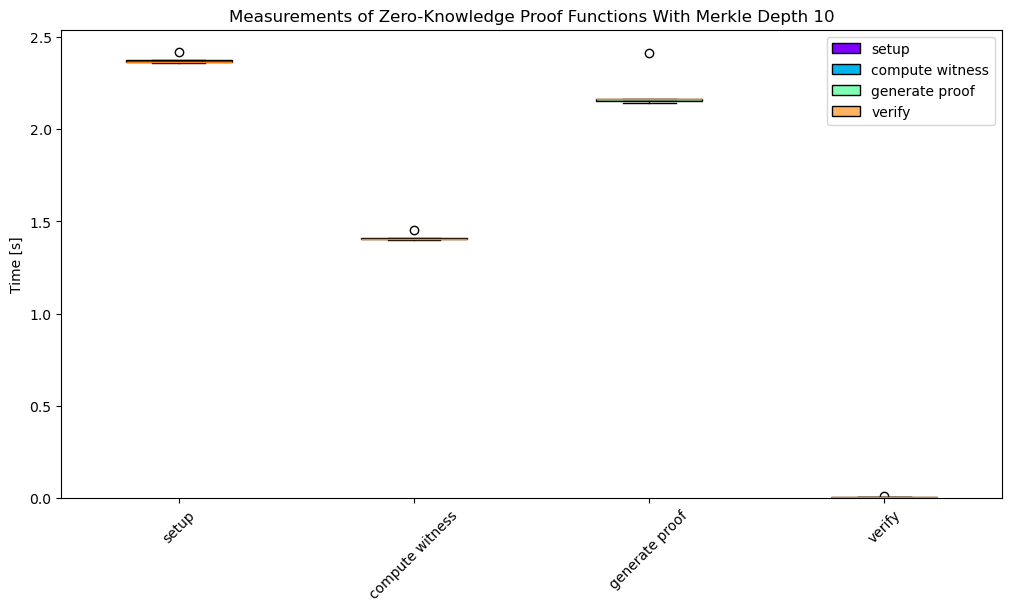

In [40]:

# parser.add_argument("--sort-by", choices=["median"], help="Sort method")
# parser.add_argument(
#     "--labels", help="Comma-separated list of entries for the plot legend"


if labels:
    labels = labels.split(",")
else:
    labels = [b["command"] for b in results]
times = [b["times"] for b in results]

if sort_by == "median":
    medians = [b["median"] for b in results]
    indices = sorted(range(len(labels)), key=lambda k: medians[k])
    labels = [labels[i] for i in indices]
    times = [times[i] for i in indices]

plt.figure(figsize=(10, 6), constrained_layout=True)
boxplot = plt.boxplot(times, vert=True, patch_artist=True)
cmap = plt.get_cmap("rainbow")
colors = [cmap(val / len(times)) for val in range(len(times))]

for patch, color in zip(boxplot["boxes"], colors):
    patch.set_facecolor(color)


plt.title(title)
plt.legend(handles=boxplot["boxes"], labels=labels, loc="best", fontsize="medium")
plt.ylabel("Time [s]")
plt.ylim(0, None)
plt.xticks(list(range(1, len(labels) + 1)), labels, rotation=45)
if save_fig:
    plt.savefig(output_fig_file)
else:
    plt.show()

In [7]:
print(results+results)

[{'command': 'zokrates verify', 'mean': 0.00632966066, 'stddev': 0.002263591629058387, 'median': 0.005639752460000001, 'user': 0.00382828, 'system': 0.0013827599999999998, 'min': 0.00498741846, 'max': 0.010333419460000002, 'times': [0.010333419460000002, 0.0056932104600000005, 0.004994502460000001, 0.00498741846, 0.005639752460000001], 'exit_codes': [0, 0, 0, 0, 0]}, {'command': 'zokrates verify', 'mean': 0.00632966066, 'stddev': 0.002263591629058387, 'median': 0.005639752460000001, 'user': 0.00382828, 'system': 0.0013827599999999998, 'min': 0.00498741846, 'max': 0.010333419460000002, 'times': [0.010333419460000002, 0.0056932104600000005, 0.004994502460000001, 0.00498741846, 0.005639752460000001], 'exit_codes': [0, 0, 0, 0, 0]}]
